In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

## 1) Dataset

In [2]:
#Load from CSV
train_dataset = pd.read_csv('regression_dataset/train_data.csv').values
test_dataset = pd.read_csv('regression_dataset/test_data.csv').values

#Prepare X_train, y_train, X_test, y_test
X_train=train_dataset[:,0]
y_train=train_dataset[:,1]

X_test=test_dataset[:,0]
y_test=test_dataset[:,1]

#convert to Pytorch tensor
X_train=np.expand_dims(X_train, axis=1)
y_train=np.expand_dims(y_train, axis=1)
X_train=torch.from_numpy(X_train).float()
y_train=torch.from_numpy(y_train).float()

X_test=np.expand_dims(X_test, axis=1)
y_test=np.expand_dims(y_test, axis=1)
X_test=torch.from_numpy(X_test).float()
y_test=torch.from_numpy(y_test).float()

## 2) Models

In [3]:
class BasicRegNet(nn.Module):
    
    def __init__(self, Ni, Nh1, Nh2, No):
        """
        Ni - Input size
        Nh1 - Neurons in the 1st hidden layer
        Nh2 - Neurons in the 2nd hidden layer
        No - Output size
        """
        super().__init__()
        
        self.fc1 = nn.Linear(in_features=Ni, out_features=Nh1)
        self.fc2 = nn.Linear(in_features=Nh1, out_features=Nh2)
        self.out = nn.Linear(in_features=Nh2, out_features=No)
        self.sig = nn.Sigmoid()
        self.relu= nn.ReLU()
        
        self.name="BasicRegNet"

        print('Network initialized')
        
    def forward(self, x, additional_out=False):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.out(x)
        return x

## 3) Training

In [4]:
# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training device: {device}")

# Define the loss function
loss_function = nn.MSELoss()


from skorch.callbacks import EarlyStopping

my_early = EarlyStopping(
    monitor='valid_loss',
    patience=500,
    threshold=0.0001,
    threshold_mode='rel',
    lower_is_better=True)


from skorch import NeuralNetRegressor

net = NeuralNetRegressor(
    module=BasicRegNet,
    module__Ni= 1,
    module__Nh1 = 32,
    module__Nh2 = 32,
    module__No = 1,
    max_epochs=2000,
    
    device=device,  # uncomment this to train with CUDA
    optimizer = optim.Adam,
    optimizer__lr=0.001,
    #criterion=nn.MSELoss() #used by default
    callbacks = [my_early]
)

Training device: cuda


In [5]:
net.fit(X_train, y_train)

Network initialized
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1       13.4880        6.1625  0.2343
      2       13.0072        6.0860  0.0130
      3       12.5396        6.0157  0.0050
      4       12.0984        5.9493  0.0060
      5       11.6815        5.8865  0.0060
      6       11.2764        5.8253  0.0050
      7       10.8826        5.7676  0.0070
      8       10.5000        5.7124  0.0050
      9       10.1278        5.6504  0.0060
     10        9.7684        5.5857  0.0070
     11        9.4414        5.5200  0.0050
     12        9.1246        5.4555  0.0060
     13        8.8165        5.3926  0.0060
     14        8.5170        5.3314  0.0060
     15        8.2260        5.2719  0.0050
     16        7.9448        5.2143  0.0070
     17        7.6751        5.1583  0.0050
     18        7.4164        5.1027  0.0050
     19        7.1769        5.0458  0.0100
     20        6.9461        4.9898  0.0060
     21     

    147        2.1711        5.6769  0.0050
    148        2.1644        5.6650  0.0050
    149        2.1576        5.6530  0.0060
    150        2.1508        5.6407  0.0050
    151        2.1439        5.6287  0.0050
    152        2.1371        5.6170  0.0050
    153        2.1303        5.6063  0.0050
    154        2.1234        5.5901  0.0050
    155        2.1165        5.5761  0.0050
    156        2.1096        5.5625  0.0050
    157        2.1027        5.5487  0.0060
    158        2.0957        5.5346  0.0050
    159        2.0888        5.5202  0.0050
    160        2.0818        5.5055  0.0070
    161        2.0748        5.4906  0.0060
    162        2.0678        5.4754  0.0050
    163        2.0607        5.4599  0.0050
    164        2.0537        5.4442  0.0050
    165        2.0466        5.4283  0.0060
    166        2.0395        5.4121  0.0060
    167        2.0324        5.3958  0.0060
    168        2.0253        5.3793  0.0060
    169        2.0182        5.3

    291        1.4325        3.5935  0.0050
    292        1.4307        3.5861  0.0050
    293        1.4290        3.5788  0.0050
    294        1.4273        3.5717  0.0050
    295        1.4256        3.5646  0.0050
    296        1.4239        3.5576  0.0070
    297        1.4223        3.5507  0.0050
    298        1.4206        3.5439  0.0060
    299        1.4190        3.5372  0.0065
    300        1.4174        3.5305  0.0060
    301        1.4158        3.5239  0.0060
    302        1.4142        3.5174  0.0050
    303        1.4127        3.5109  0.0050
    304        1.4111        3.5045  0.0060
    305        1.4096        3.4982  0.0050
    306        1.4080        3.4919  0.0050
    307        1.4065        3.4856  0.0160
    308        1.4050        3.4794  0.0060
    309        1.4035        3.4733  0.0050
    310        1.4020        3.4673  0.0050
    311        1.4005        3.4613  0.0050
    312        1.3990        3.4555  0.0060
    313        1.3975        3.4

    423        1.2467        3.0152  0.0050
    424        1.2453        3.0114  0.0060
    425        1.2439        3.0076  0.0060
    426        1.2425        3.0038  0.0050
    427        1.2411        3.0000  0.0050
    428        1.2397        2.9963  0.0050
    429        1.2383        2.9925  0.0070
    430        1.2369        2.9888  0.0050
    431        1.2354        2.9851  0.0090
    432        1.2340        2.9815  0.0050
    433        1.2326        2.9779  0.0060
    434        1.2312        2.9742  0.0050
    435        1.2298        2.9706  0.0050
    436        1.2284        2.9670  0.0050
    437        1.2270        2.9634  0.0050
    438        1.2256        2.9598  0.0060
    439        1.2241        2.9562  0.0073
    440        1.2227        2.9525  0.0050
    441        1.2214        2.9487  0.0060
    442        1.2199        2.9449  0.0060
    443        1.2185        2.9411  0.0060
    444        1.2171        2.9373  0.0060
    445        1.2157        2.9

    556        1.0416        2.4486  0.0060
    557        1.0398        2.4440  0.0050
    558        1.0380        2.4401  0.0050
    559        1.0362        2.4366  0.0060
    560        1.0345        2.4334  0.0060
    561        1.0327        2.4302  0.0060
    562        1.0309        2.4269  0.0060
    563        1.0291        2.4234  0.0060
    564        1.0273        2.4195  0.0070
    565        1.0256        2.4153  0.0060
    566        1.0238        2.4106  0.0060
    567        1.0220        2.4057  0.0059
    568        1.0202        2.4005  0.0060
    569        1.0184        2.3954  0.0059
    570        1.0165        2.3910  0.0050
    571        1.0147        2.3866  0.0050
    572        1.0129        2.3818  0.0050
    573        1.0111        2.3775  0.0059
    574        1.0093        2.3727  0.0050
    575        1.0075        2.3674  0.0060
    576        1.0056        2.3614  0.0060
    577        1.0038        2.3549  0.0060
    578        1.0020        2.3

    689        0.7884        1.7538  0.0050
    690        0.7865        1.7488  0.0050
    691        0.7845        1.7426  0.0070
    692        0.7826        1.7358  0.0060
    693        0.7807        1.7298  0.0060
    694        0.7788        1.7249  0.0060
    695        0.7768        1.7212  0.0060
    696        0.7749        1.7185  0.0060
    697        0.7730        1.7164  0.0060
    698        0.7711        1.7146  0.0060
    699        0.7691        1.7124  0.0050
    700        0.7672        1.7096  0.0050
    701        0.7653        1.7051  0.0060
    702        0.7634        1.6996  0.0060
    703        0.7614        1.6926  0.0060
    704        0.7596        1.6847  0.0060
    705        0.7577        1.6776  0.0060
    706        0.7558        1.6717  0.0070
    707        0.7539        1.6675  0.0060
    708        0.7521        1.6644  0.0080
    709        0.7502        1.6619  0.0050
    710        0.7483        1.6598  0.0060
    711        0.7464        1.6

    822        0.5497        1.1810  0.0050
    823        0.5480        1.1777  0.0060
    824        0.5464        1.1746  0.0060
    825        0.5448        1.1713  0.0050
    826        0.5432        1.1676  0.0050
    827        0.5415        1.1637  0.0060
    828        0.5399        1.1599  0.0060
    829        0.5382        1.1566  0.0050
    830        0.5367        1.1539  0.0050
    831        0.5350        1.1518  0.0080
    832        0.5334        1.1497  0.0060
    833        0.5317        1.1475  0.0060
    834        0.5301        1.1450  0.0050
    835        0.5286        1.1418  0.0050
    836        0.5269        1.1379  0.0050
    837        0.5253        1.1335  0.0059
    838        0.5236        1.1293  0.0060
    839        0.5220        1.1253  0.0060
    840        0.5203        1.1214  0.0060
    841        0.5187        1.1171  0.0050
    842        0.5170        1.1126  0.0050
    843        0.5153        1.1082  0.0040
    844        0.5137        1.1

    955        0.3558        0.8575  0.0060
    956        0.3547        0.8559  0.0050
    957        0.3536        0.8539  0.0060
    958        0.3524        0.8518  0.0060
    959        0.3513        0.8498  0.0060
    960        0.3502        0.8479  0.0050
    961        0.3491        0.8463  0.0060
    962        0.3480        0.8450  0.0060
    963        0.3469        0.8440  0.0050
    964        0.3458        0.8433  0.0055
    965        0.3447        0.8427  0.0050
    966        0.3436        0.8421  0.0060
    967        0.3425        0.8414  0.0060
    968        0.3414        0.8400  0.0050
    969        0.3404        0.8377  0.0050
    970        0.3393        0.8348  0.0060
    971        0.3382        0.8322  0.0060
    972        0.3371        0.8300  0.0060
    973        0.3361        0.8286  0.0050
    974        0.3350        0.8279  0.0060
    975        0.3340        0.8271  0.0050
    976        0.3330        0.8264  0.0050
    977        0.3319        0.8

   1091        0.2508        0.7026  0.0050
   1092        0.2503        0.7025  0.0060
   1093        0.2499        0.7022  0.0060
   1094        0.2495        0.7016  0.0050
   1095        0.2490        0.7011  0.0050
   1096        0.2486        0.7000  0.0060
   1097        0.2481        0.6984  0.0050
   1098        0.2477        0.6973  0.0060
   1099        0.2473        0.6962  0.0060
   1100        0.2469        0.6957  0.0060
   1101        0.2465        0.6957  0.0050
   1102        0.2461        0.6961  0.0060
   1103        0.2457        0.6963  0.0050
   1104        0.2454        0.6952  0.0060
   1105        0.2450        0.6936  0.0050
   1106        0.2445        0.6927  0.0050
   1107        0.2442        0.6918  0.0050
   1108        0.2438        0.6915  0.0050
   1109        0.2434        0.6911  0.0050
   1110        0.2431        0.6906  0.0060
   1111        0.2427        0.6896  0.0060
   1112        0.2423        0.6887  0.0050
   1113        0.2420        0.6

   1227        0.2152        0.6279  0.0049
   1228        0.2150        0.6283  0.0060
   1229        0.2148        0.6283  0.0060
   1230        0.2146        0.6282  0.0050
   1231        0.2144        0.6282  0.0050
   1232        0.2142        0.6278  0.0050
   1233        0.2140        0.6274  0.0080
   1234        0.2139        0.6269  0.0060
   1235        0.2137        0.6262  0.0060
   1236        0.2135        0.6258  0.0060
   1237        0.2133        0.6259  0.0050
   1238        0.2131        0.6263  0.0050
   1239        0.2130        0.6265  0.0060
   1240        0.2128        0.6265  0.0050
   1241        0.2126        0.6259  0.0059
   1242        0.2124        0.6253  0.0060
   1243        0.2122        0.6249  0.0050
   1244        0.2121        0.6249  0.0050
   1245        0.2119        0.6254  0.0050
   1246        0.2117        0.6255  0.0050
   1247        0.2115        0.6252  0.0060
   1248        0.2113        0.6249  0.0060
   1249        0.2112        0.6

   1372        0.1965        0.6094  0.0050
   1373        0.1964        0.6089  0.0060
   1374        0.1961        0.6089  0.0060
   1375        0.1959        0.6085  0.0060
   1376        0.1958        0.6078  0.0060
   1377        0.1956        0.6075  0.0060
   1378        0.1954        0.6074  0.0050
   1379        0.1952        0.6078  0.0050
   1380        0.1951        0.6075  0.0050
   1381        0.1950        0.6072  0.0050
   1382        0.1948        0.6066  0.0050
   1383        0.1947        0.6058  0.0050
   1384        0.1945        0.6050  0.0050
   1385        0.1944        0.6047  0.0060
   1386        0.1942        0.6051  0.0060
   1387        0.1940        0.6056  0.0060
   1388        0.1939        0.6056  0.0050
   1389        0.1938        0.6057  0.0060
   1390        0.1936        0.6052  0.0058
   1391        0.1935        0.6041  0.0050
   1392        0.1934        0.6031  0.0060
   1393        0.1933        0.6025  0.0060
   1394        0.1931        0.6

   1520        0.1793        0.5915  0.0050
   1521        0.1793        0.5917  0.0050
   1522        0.1792        0.5911  0.0060
   1523        0.1791        0.5916  0.0060
   1524        0.1791        0.5912  0.0050
   1525        0.1790        0.5900  0.0060
   1526        0.1788        0.5891  0.0050
   1527        0.1788        0.5889  0.0059
   1528        0.1788        0.5888  0.0060
   1529        0.1786        0.5891  0.0059
   1530        0.1785        0.5894  0.0050
   1531        0.1785        0.5892  0.0050
   1532        0.1784        0.5880  0.0060
   1533        0.1782        0.5872  0.0060
   1534        0.1782        0.5870  0.0040
   1535        0.1781        0.5871  0.0106
   1536        0.1780        0.5872  0.0060
   1537        0.1779        0.5874  0.0050
   1538        0.1779        0.5868  0.0058
   1539        0.1778        0.5862  0.0050
   1540        0.1777        0.5857  0.0050
   1541        0.1777        0.5857  0.0060
   1542        0.1776        0.5

   1666        0.1692        0.5696  0.0050
   1667        0.1692        0.5688  0.0060
   1668        0.1692        0.5681  0.0060
   1669        0.1691        0.5679  0.0060
   1670        0.1690        0.5681  0.0070
   1671        0.1689        0.5681  0.0060
   1672        0.1689        0.5679  0.0060
   1673        0.1688        0.5668  0.0060
   1674        0.1688        0.5662  0.0050
   1675        0.1687        0.5661  0.0060
   1676        0.1687        0.5665  0.0050
   1677        0.1686        0.5664  0.0060
   1678        0.1685        0.5655  0.0060
   1679        0.1685        0.5646  0.0050
   1680        0.1685        0.5642  0.0060
   1681        0.1684        0.5643  0.0060
   1682        0.1683        0.5650  0.0050
   1683        0.1682        0.5659  0.0050
   1684        0.1683        0.5655  0.0060
   1685        0.1682        0.5644  0.0060
   1686        0.1681        0.5634  0.0050
   1687        0.1681        0.5628  0.0060
   1688        0.1680        0.5

   1808        0.1621        0.5300  0.0050
   1809        0.1620        0.5290  0.0060
   1810        0.1619        0.5284  0.0050
   1811        0.1619        0.5279  0.0060
   1812        0.1619        0.5278  0.0060
   1813        0.1618        0.5280  0.0050
   1814        0.1617        0.5284  0.0060
   1815        0.1617        0.5283  0.0060
   1816        0.1616        0.5278  0.0060
   1817        0.1616        0.5269  0.0050
   1818        0.1615        0.5265  0.0056
   1819        0.1615        0.5260  0.0050
   1820        0.1614        0.5254  0.0060
   1821        0.1614        0.5251  0.0060
   1822        0.1613        0.5251  0.0060
   1823        0.1613        0.5254  0.0060
   1824        0.1612        0.5252  0.0060
   1825        0.1611        0.5248  0.0060
   1826        0.1611        0.5241  0.0050
   1827        0.1610        0.5240  0.0050
   1828        0.1610        0.5236  0.0060
   1829        0.1610        0.5232  0.0060
   1830        0.1608        0.5

   1956        0.1560        0.5084  0.0050
   1957        0.1559        0.5080  0.0060
   1958        0.1559        0.5080  0.0050
   1959        0.1559        0.5077  0.0060
   1960        0.1558        0.5082  0.0060
   1961        0.1558        0.5093  0.0050
   1962        0.1557        0.5106  0.0050
   1963        0.1557        0.5115  0.0050
   1964        0.1558        0.5106  0.0050
   1965        0.1557        0.5087  0.0060
   1966        0.1556        0.5078  0.0060
   1967        0.1556        0.5072  0.0060
   1968        0.1556        0.5074  0.0060
   1969        0.1555        0.5080  0.0060
   1970        0.1555        0.5075  0.0060
   1971        0.1555        0.5071  0.0060
   1972        0.1555        0.5072  0.0060
   1973        0.1554        0.5080  0.0050
   1974        0.1554        0.5092  0.0050
   1975        0.1553        0.5106  0.0050
   1976        0.1553        0.5102  0.0060
   1977        0.1553        0.5077  0.0050
   1978        0.1552        0.5

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=BasicRegNet(
    (fc1): Linear(in_features=1, out_features=32, bias=True)
    (fc2): Linear(in_features=32, out_features=32, bias=True)
    (out): Linear(in_features=32, out_features=1, bias=True)
    (sig): Sigmoid()
    (relu): ReLU()
  ),
)

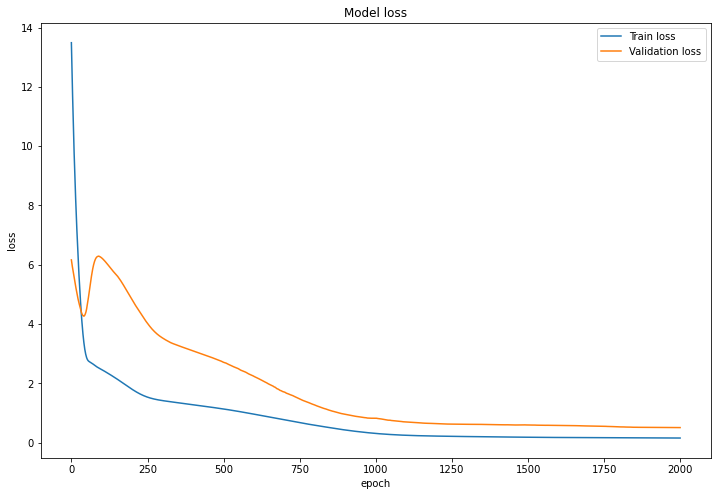

In [6]:
import datetime
save_name=datetime.datetime.now().strftime("%Y-%m-%d_%H-%M")

# get train losses from all epochs, a list of floats
history = net.history
train_loss_log=history[:, 'train_loss']
val_loss_log=history[:, 'valid_loss']

# Plot losses
plt.figure(figsize=(12,8))
plt.plot(train_loss_log)
plt.plot(val_loss_log)
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper right')
plt.savefig("models/"+save_name+"_Losses", dpi=400)
plt.show()

## 4) Test the model

In [7]:
y_pred = net.predict(X_test)
y_pred = torch.from_numpy(y_pred).float()

test_loss = loss_function(y_pred, y_test)
print(f"TEST LOSS: {test_loss}")

AVERAGE TEST LOSS: 0.1626795530319214


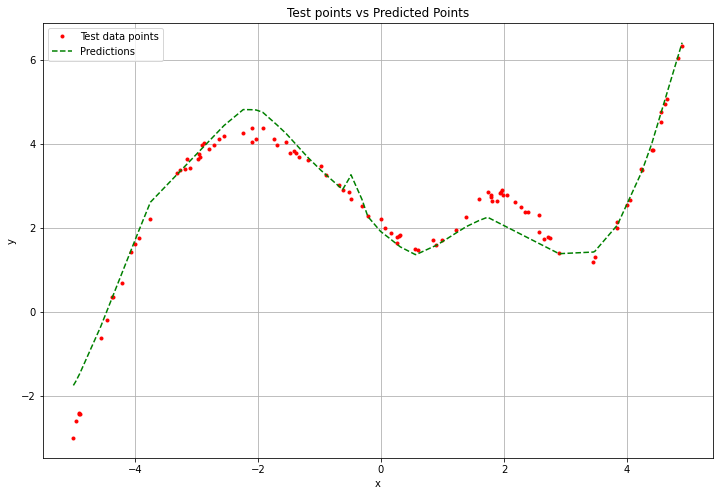

In [8]:
zipped_lists = zip(X_test, y_pred)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
X, y = [ list(tuple) for tuple in  tuples]

plt.figure(figsize=(12,8))
plt.plot(X_test, y_test, color='r', ls='', marker='.')
plt.plot(X, y, color='g', ls='--')
plt.title('Test points vs Predicted Points')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(['Test data points', 'Predictions'], loc='upper left')
plt.savefig("models/"+save_name+"_Predictions", dpi=400)
plt.show()


## 5) Metrics Summary

In [9]:
#Train Loss
train_loss=train_loss_log[-1]

#Val loss
val_loss=val_loss_log[-1]

print("Train Loss:\t",round(train_loss,3))
print("Val Loss:\t",round(val_loss,3))
print("Test Loss:\t",round(float(test_loss),3))

Train Loss:	 0.155
Val Loss:	 0.507
Test Loss:	 0.163


## 6) Save model

In [10]:
#Saving the whole model
import pickle
with open("models/"+save_name+".pkl", 'wb') as f:
    pickle.dump(net, f)
    
#Load the model
#with open(file_name, 'rb') as f:
#    new_net = pickle.load(f)

#Save Metrics to File
f = open("models/"+save_name+"_Metrics.txt", "a")
f.write('Train loss:\t'+ str(round(train_loss,3))+ "\n")
f.write('Val loss:\t'+ str(round(val_loss,3))+ "\n")
f.write('Test loss:\t'+ str(round(float(test_loss),3))+ "\n")
f.close()

## 7) Network Analysis

### 7.1) Weights histogram

In [11]:
#Access network parameters
my_best_net = net.module_

#First hidden Layer
h1_w = my_best_net.fc1.weight.data.cpu().numpy()
h1_b = my_best_net.fc1.bias.data.cpu().numpy()

#Second hidden Layer
h2_w = my_best_net.fc2.weight.data.cpu().numpy()
h2_b = my_best_net.fc2.bias.data.cpu().numpy()

# Output layer
out_w = my_best_net.out.weight.data.cpu().numpy()
out_b = my_best_net.out.bias.data.cpu().numpy()


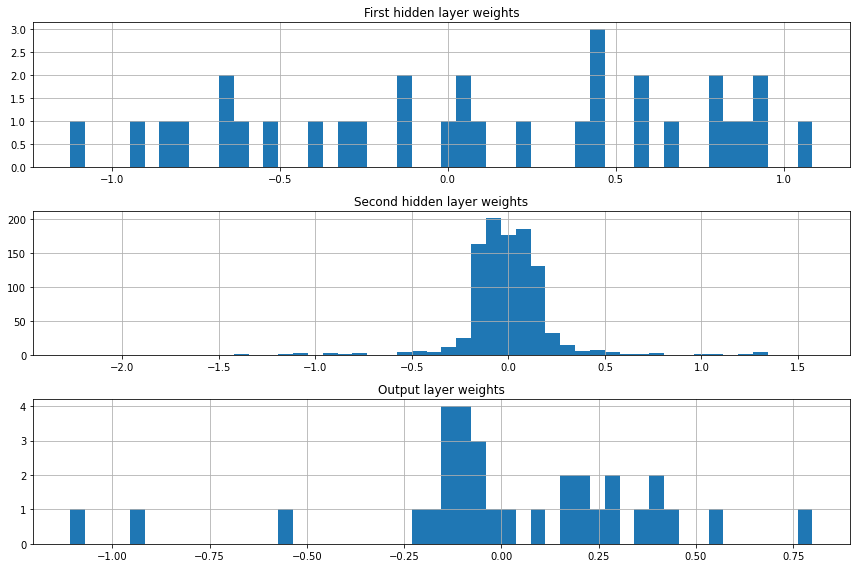

In [12]:
# Weights histogram
fig, axs = plt.subplots(3, 1, figsize=(12,8))
axs[0].hist(h1_w.flatten(), 50)
axs[0].set_title('First hidden layer weights')
axs[1].hist(h2_w.flatten(), 50)
axs[1].set_title('Second hidden layer weights')
axs[2].hist(out_w.flatten(), 50)
axs[2].set_title('Output layer weights')
[ax.grid() for ax in axs]
plt.tight_layout()
plt.savefig("models/"+save_name+"_Weights-histogram", dpi=400)
plt.show()

### 7.2) Analyze activations

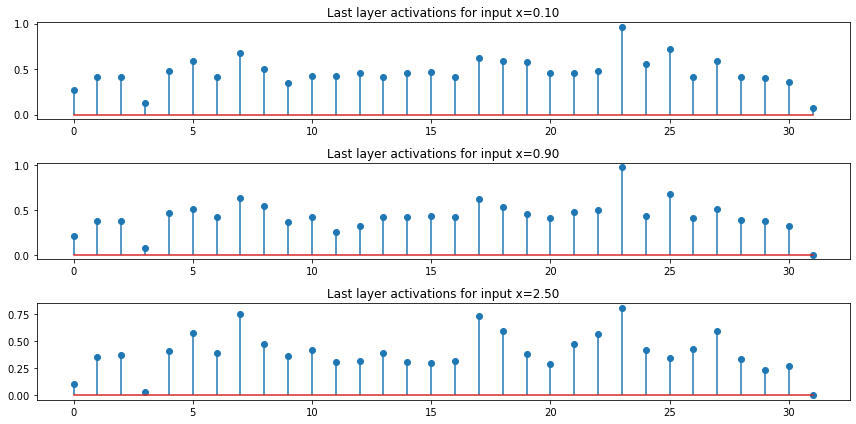

In [13]:
def get_activation(layer, input, output):
    global activation
    activation = torch.sigmoid(output)
    
### Register hook
net=my_best_net
hook_handle = net.fc2.register_forward_hook(get_activation)

### Analyze activations
net = net.to(device)
net.eval()
with torch.no_grad():
    x1 = torch.tensor([0.1]).float().to(device)
    y1 = net(x1)
    z1 = activation
    x2 = torch.tensor([0.9]).float().to(device)
    y2 = net(x2)
    z2 = activation
    x3 = torch.tensor([2.5]).float().to(device)
    y3 = net(x3)
    z3 = activation

### Remove hook
hook_handle.remove()

### Plot activations
fig, axs = plt.subplots(3, 1, figsize=(12,6))
axs[0].stem(z1.cpu().numpy(), use_line_collection=True)
axs[0].set_title('Last layer activations for input x=%.2f' % x1)
axs[1].stem(z2.cpu().numpy(), use_line_collection=True)
axs[1].set_title('Last layer activations for input x=%.2f' % x2)
axs[2].stem(z3.cpu().numpy(), use_line_collection=True)
axs[2].set_title('Last layer activations for input x=%.2f' % x3)
plt.tight_layout()
plt.savefig("models/"+save_name+"_Activations", dpi=400)
plt.show()